### Surprise Housing company house price prediction using Linear, Ridge and Lasso Regression
#### The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [5]:
houses['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [6]:
houses['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [7]:
houses['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [8]:
houses['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [9]:
houses['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [10]:
houses['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

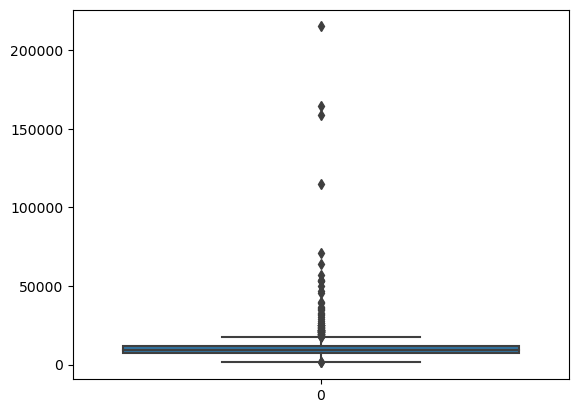

In [11]:
sns.boxplot(houses['LotArea'])
plt.show()
# looks like it has some outliers, Most of the values lies below 20k

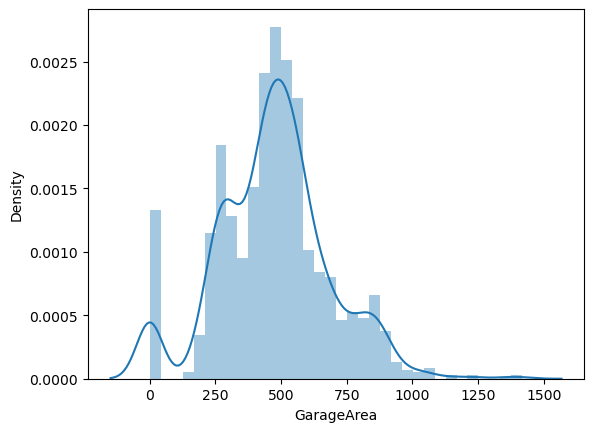

In [12]:
sns.distplot(houses['GarageArea'])
plt.show()

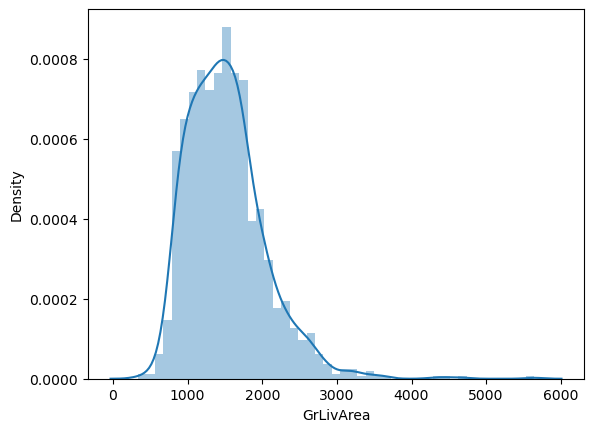

In [13]:
sns.distplot(houses['GrLivArea'])
plt.show()

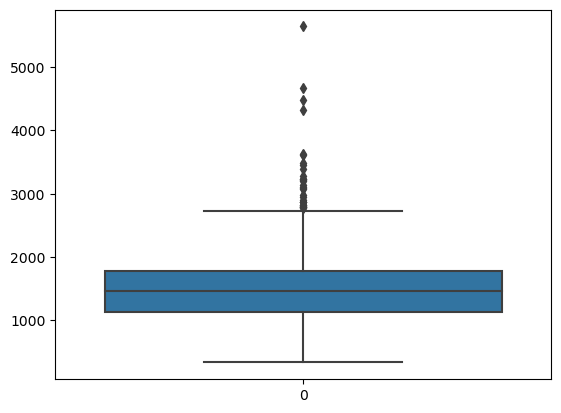

In [14]:
sns.boxplot(houses['GrLivArea'])
plt.show()
#most of the value lies between 1000-2000 sqft

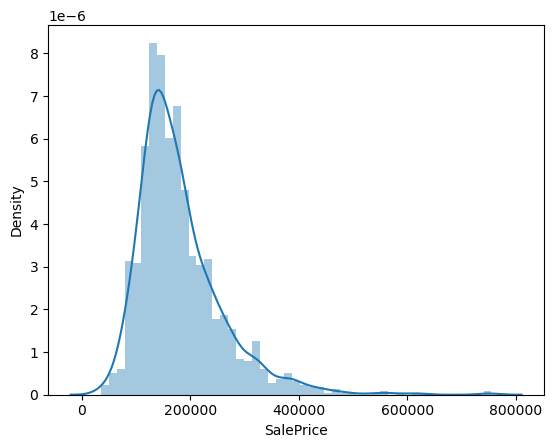

In [15]:
# target variable: salePrice of house
sns.distplot(houses['SalePrice'])
plt.show()

In [16]:
# all numeric (float and int) variables in the dataset
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
#### Drop categorical from it
houses_numeric =  houses_numeric.drop(['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold','GarageCars','GarageYrBlt','FullBath','HalfBath','Fireplaces','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt'], axis=1)
houses_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [18]:
# correlation matrix
cor = houses_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


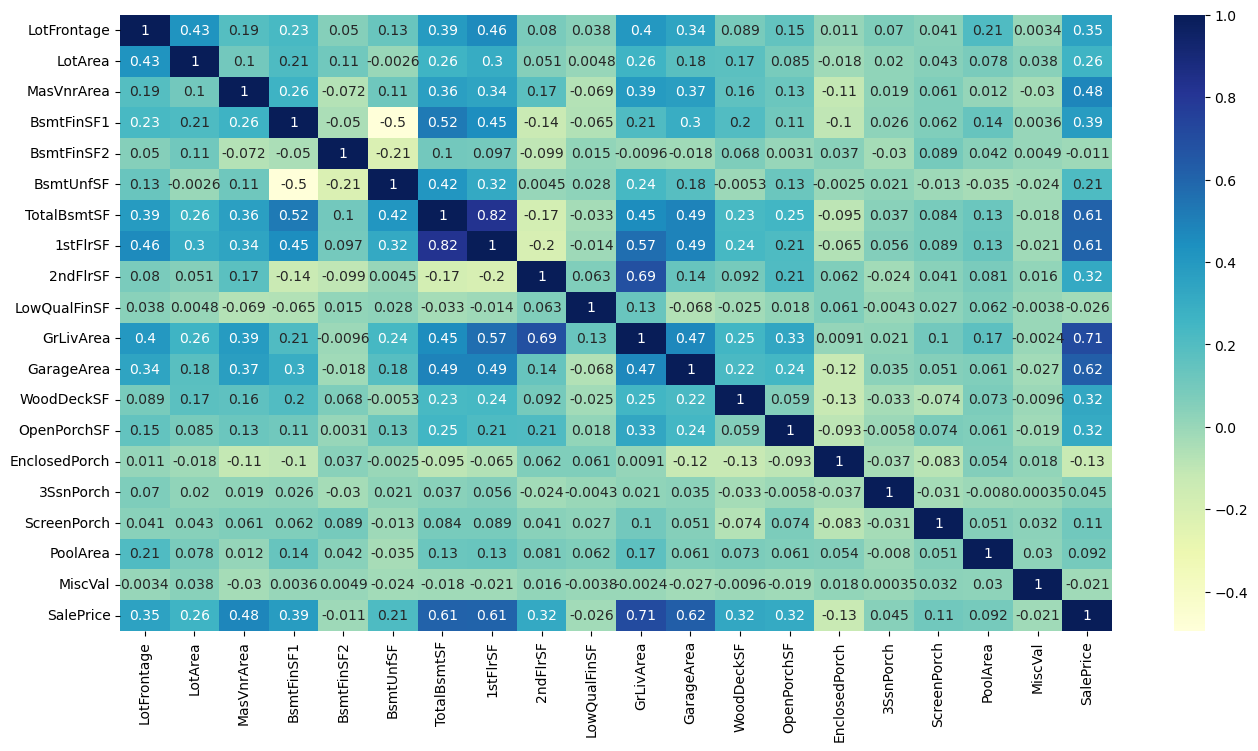

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Observation from above heat map
1. SalePrice highly correlate with GrLiveArea, GarageArea, TotalBsmtSF, 1stFlrSF comparetive to other fields
2. SalePrice negitively correalte with KitchenAbvGr, EncolsedProrch fields

Correlation among independent variables:
1. TotRmsAbvGrd is higly correlate with GrLiveArea and BedroomAbvGr, TotalBsmtSF and 1stFlrSF

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are missing values in the dataset. We've also seen that some variables are in the correct format,  which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 

In [20]:
pd.set_option('display.max_rows', 500)

In [21]:
# Check how many nulls are present in each column
houses.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [22]:
# Most number of null values present in following fields PoolQC, MiscFeature, Alley, Fence
houses_02 = houses.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [23]:
# Next highest number of null values present in FireplaceQu, Let's check what values are present in it
houses_02.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
# Looks like if value not presented places we can treat as no fire place resent at that place, 
# so we can fill that vlaueswith NA

houses_02.FireplaceQu = houses_02.FireplaceQu.fillna("NA")

In [25]:
# LotFrontage has next highest null values, we can not fill these value either mean, median or mode since they are not
# distributed evenly to the all values, if we fill those nulls with any value, it will impact results,
# So we need to drop those rows from the data.

houses_03 = houses_02[~houses_02.LotFrontage.isnull()]

In [26]:
# GarageType, GarageYrBlt, GarageFinish,  GarageQual,GarageCond  has null values since those houses has no garage
# Lets fill those values with NA

houses_03.GarageType = houses_03.GarageType.fillna("NA")
houses_03.GarageYrBlt = houses_03.GarageYrBlt.fillna("NA")
houses_03.GarageFinish = houses_03.GarageFinish.fillna("NA")
houses_03.GarageQual = houses_03.GarageQual.fillna("NA")
houses_03.GarageCond = houses_03.GarageCond.fillna("NA")

In [27]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 has no Bsmt, filling these values with NA

houses_03.BsmtQual = houses_03.BsmtQual.fillna("NA")
houses_03.BsmtCond = houses_03.BsmtCond.fillna("NA")
houses_03.BsmtExposure = houses_03.BsmtExposure.fillna("NA")
houses_03.BsmtFinType1 = houses_03.BsmtFinType1.fillna("NA")
houses_03.BsmtFinType2 = houses_03.BsmtFinType2.fillna("NA")

In [28]:
# MasVnrType null values will be filled with None

houses_03.MasVnrType = houses_03.MasVnrType.fillna("None")

In [29]:
# MasVnrArea null values will be filled with 0.0
houses_03.MasVnrArea = houses_03.MasVnrArea.fillna(0.0)

In [30]:
 # Electrical null value can be filled with SBrkr which is mode of that field
houses_03.Electrical = houses_03.Electrical.fillna('SBrkr')

In [31]:
# All nulls are removed now, lets check values once
houses_03.info()

# Total rows 1201 and columns 77

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1201 non-null   int64  
 1   MSSubClass     1201 non-null   int64  
 2   MSZoning       1201 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1201 non-null   int64  
 5   Street         1201 non-null   object 
 6   LotShape       1201 non-null   object 
 7   LandContour    1201 non-null   object 
 8   Utilities      1201 non-null   object 
 9   LotConfig      1201 non-null   object 
 10  LandSlope      1201 non-null   object 
 11  Neighborhood   1201 non-null   object 
 12  Condition1     1201 non-null   object 
 13  Condition2     1201 non-null   object 
 14  BldgType       1201 non-null   object 
 15  HouseStyle     1201 non-null   object 
 16  OverallQual    1201 non-null   int64  
 17  OverallCond    1201 non-null   int64  
 18  YearBuil

In [32]:
# lets check values 
pd.set_option('display.max_columns', 80)
houses_03.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
# Id we can remove because it wont be helpful to get insights
# LotFrontage we can convert to int from float since no value contain fraction
# MasVnrArea we can convert to int from float since no value contain fraction
houses_03['LotFrontage'] = houses_03['LotFrontage'].astype(int)
houses_03['MasVnrArea'] = houses_03['MasVnrArea'].astype(int)
houses_03 = houses_03.drop(columns=['Id'])

In [34]:
# converting OverallQual,  to categorical
houses_03['OverallQual'] = houses_03['OverallQual'].astype('object')
houses_03['OverallCond'] = houses_03['OverallCond'].astype('object')

#BsmtFullBath,BsmtHalfBath,FullBath,HalfBath, BedroomAbvGr,KitchenAbvGr, TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
houses_03['BsmtFullBath'] = houses_03['BsmtFullBath'].astype('object')
houses_03['BsmtHalfBath'] = houses_03['BsmtHalfBath'].astype('object')
houses_03['FullBath'] = houses_03['FullBath'].astype('object')
houses_03['HalfBath'] = houses_03['HalfBath'].astype('object')
houses_03['BedroomAbvGr'] = houses_03['BedroomAbvGr'].astype('object')
houses_03['KitchenAbvGr'] = houses_03['KitchenAbvGr'].astype('object')
houses_03['TotRmsAbvGrd'] = houses_03['TotRmsAbvGrd'].astype('object')
houses_03['Fireplaces'] = houses_03['Fireplaces'].astype('object')
houses_03['GarageCars'] = houses_03['GarageCars'].astype('object')
houses_03['MoSold'] = houses_03['MoSold'].astype('object')


In [35]:
houses_03['GarageYrBlt'].value_counts()


NA        74
2005.0    65
2006.0    59
2007.0    48
2004.0    46
2003.0    43
2008.0    29
1998.0    26
1999.0    25
1977.0    23
1950.0    23
2009.0    20
1968.0    19
1996.0    18
1976.0    18
1958.0    18
1962.0    17
1957.0    17
1974.0    17
1954.0    16
1965.0    16
1997.0    16
2002.0    16
1959.0    15
1993.0    15
1964.0    15
1995.0    14
2000.0    14
1994.0    14
1980.0    13
1990.0    13
1970.0    13
1956.0    13
1920.0    13
1940.0    12
1963.0    12
1960.0    12
1966.0    12
1978.0    12
1973.0    11
1972.0    11
1988.0    11
1948.0    11
1969.0    11
2001.0    11
1953.0    11
1971.0    10
1941.0    10
1979.0    10
1967.0    10
1961.0    10
1989.0     9
1955.0     9
1925.0     9
1987.0     9
1939.0     8
1992.0     8
1949.0     7
1930.0     7
1981.0     7
1985.0     7
1975.0     6
1991.0     6
1986.0     5
1922.0     5
1926.0     5
1951.0     5
1984.0     5
1936.0     4
1946.0     4
1945.0     4
1928.0     4
1916.0     4
1983.0     4
1935.0     4
2010.0     3
1932.0     3

In [36]:
# we can't determine what value we can replace with NA so we can drop this column from data
houses_03 = houses_03.drop(columns=['GarageYrBlt'])

In [37]:
# 3SsnPorch, PoolArea, MiscVal these fields contain most values as 0 so we can drop those fiedls
houses_03 = houses_03.drop(columns=['3SsnPorch','PoolArea','MiscVal'])

#### Exterior1st, Exterior2nd almost looks similar to each other in all rows, so we can drop them one


In [38]:
houses_03 = houses_03.drop(columns=['Exterior1st'])

In [39]:
houses_03.PavedDrive.value_counts()

Y    1095
N      81
P      25
Name: PavedDrive, dtype: int64

In [40]:
houses_03.GarageCond.value_counts()

TA    1082
NA      74
Fa      32
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64

## Removing outliers

In [41]:
houses_03.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000


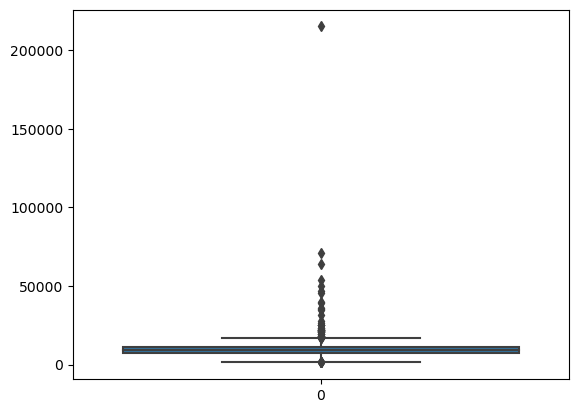

In [42]:
sns.boxplot(houses_03['LotArea'])
plt.show()

In [43]:
# From above box plot we can see that above 20000 seems outliers we can remove those columns for our analysis
houses_04 = houses_03[houses_03.LotArea < 20000]

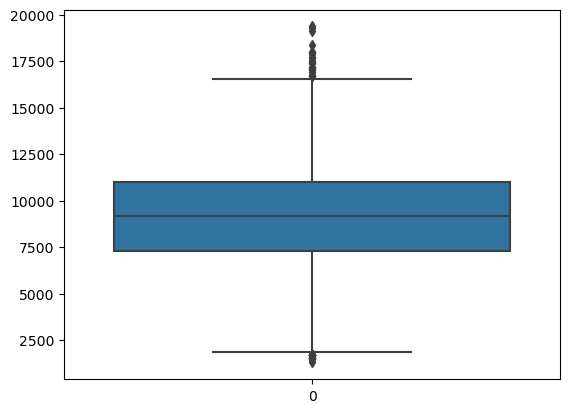

In [44]:
sns.boxplot(houses_04['LotArea'])
plt.show()

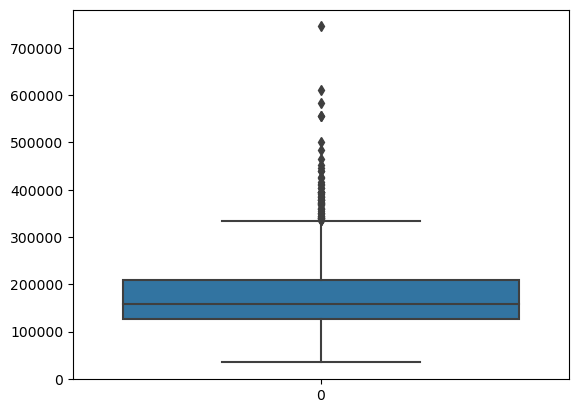

In [45]:
sns.boxplot(houses_04['SalePrice'])
plt.show()

In [46]:
# From above box plot we can see that above 400000 seems outliers we can remove those columns for our analysis
houses_04 = houses_04[houses_04.SalePrice < 400000]

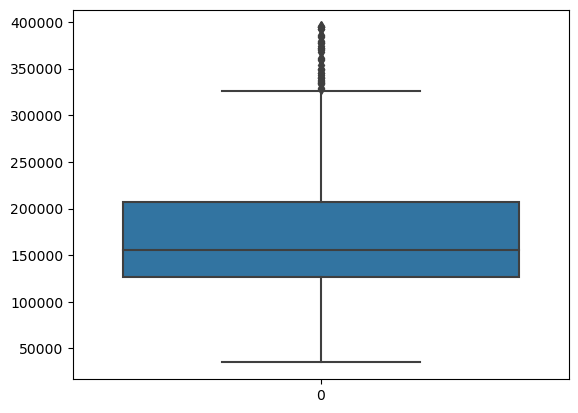

In [47]:
sns.boxplot(houses_04['SalePrice'])
plt.show()

In [48]:
houses_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1149 non-null   int64 
 1   MSZoning       1149 non-null   object
 2   LotFrontage    1149 non-null   int64 
 3   LotArea        1149 non-null   int64 
 4   Street         1149 non-null   object
 5   LotShape       1149 non-null   object
 6   LandContour    1149 non-null   object
 7   Utilities      1149 non-null   object
 8   LotConfig      1149 non-null   object
 9   LandSlope      1149 non-null   object
 10  Neighborhood   1149 non-null   object
 11  Condition1     1149 non-null   object
 12  Condition2     1149 non-null   object
 13  BldgType       1149 non-null   object
 14  HouseStyle     1149 non-null   object
 15  OverallQual    1149 non-null   object
 16  OverallCond    1149 non-null   object
 17  YearBuilt      1149 non-null   int64 
 18  YearRemodAdd   1149 non-null

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [49]:
houses_04.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [50]:
# split into X and y
X = houses_04.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']] # predictors in variable X

y = houses_04['SalePrice'] # response variable in Y


In [51]:
# creating dummy variables for categorical variables

# subset all categorical variables
houses_04_categorical = X.select_dtypes(include=['object'])
houses_04_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,TA,TA,Y,2,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,5,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,9,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,2,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,12,WD,Normal


In [52]:
# convert into dummies - one hot encoding
houses_04_dummies = pd.get_dummies(houses_04_categorical, drop_first=True)
houses_04_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [53]:
# drop categorical variables 
X = X.drop(list(houses_04_categorical.columns), axis=1)

In [54]:
# concat dummy variables with X
X = pd.concat([X, houses_04_dummies], axis=1)

In [55]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=272)

In [56]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [57]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-9986164103744.236
[-7.07896159e+03  1.62390289e+03  1.51665323e+03  9.62074705e+03
  1.17436594e+03  2.29111624e+03  1.40294128e+15  5.16944696e+14
  1.50950936e+15 -1.35549133e+15  1.82225667e+15  2.17027611e+15
  2.51913108e+14 -2.41138319e+15  1.57465724e+03  1.41899691e+03
  1.27141773e+03  1.30933558e+02  1.63492730e+03  7.60513462e+02
  1.29254091e+04  4.84784230e+03  1.88364160e+04  1.33425983e+04
  6.06900340e+02  9.40568869e+02  1.06364417e+03  1.27748667e+03
  1.01122560e+03 -7.68636413e+02  1.14224634e+03  1.59269454e+03
 -5.07939980e+02 -1.17078125e+03 -9.30437500e+02  5.54765625e+02
 -4.53812500e+02  1.22281250e+02  1.47875000e+03  2.00493750e+03
  1.28887500e+03  6.57812500e+02  4.20068750e+03 -1.94837500e+03
 -8.86250000e+01  1.94493750e+03 -2.19700000e+03 -1.64625000e+02
 -2.90437500e+02  7.72562500e+02  2.41562500e+01  2.71918750e+03
  3.89187500e+03  1.67000000e+02  5.10500000e+02  7.90406250e+02
  1.37487500e+03  2.72312500e+02  3.59637500e+03  6.71093750e+01
  6.09

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9559158771919603
-5.399319754552353e+19
159313197990.43524
9.198341249798746e+31
198150743.76919806
2.666185869506883e+29


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [61]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
print(model_cv.best_params_)

{'alpha': 100}


In [63]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.71314931e+03  2.08125798e+03  1.98127073e+03  3.88646346e+03
  2.50139357e+03  2.79966596e+03  5.37702830e+03  4.20927130e+02
  4.69832263e+02  6.24900138e+03  6.59773891e+03  5.25959563e+03
 -8.55700787e+02  9.63015183e+03  2.69710318e+03  1.61081359e+03
  2.10516650e+03 -3.76674928e+01  1.54362634e+03  8.58917856e+02
  2.42424189e+03  4.06713928e+02  1.46487012e+03 -3.43076548e+02
  1.65622900e+03  5.59444298e+02  4.44440099e+02  4.74300442e+02
  4.34148647e+02 -9.98798566e+02  7.47996499e+02  1.45707449e+03
 -2.43674484e+02 -9.81614452e+02 -7.47211308e+02  6.93831875e+02
 -5.30395634e+02 -3.68269248e+00  3.17215240e+02  5.49373476e+02
  7.38368962e+02 -3.98997723e+02  2.96922157e+03 -2.08771464e+03
 -9.14894718e+02 -5.72062826e+02 -2.63871527e+03 -7.32181089e+02
 -1.07235297e+03  3.26460637e+02 -6.27146133e+02  2.40500841e+03
  3.91706481e+03 -1.56453550e+03 -1.31104345e+02 -5.38662496e+01
  4.11807490e+02  7.38607046e+02  3.35784194e+03 -3.85988732e+02
  5.66569424e+02 -3.91010

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9492025164176425
0.9142608555833592
183574244963.67908
146066161046.50854
228326175.32795906
423380176.9464016


## Lasso

In [65]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [67]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [68]:
lasso.coef_

array([-2.12700240e+03,  1.23553343e+03,  1.63715963e+03,  7.74826643e+03,
        2.82371749e+03,  2.01408114e+03,  6.92946030e+03,  2.70249796e+02,
       -0.00000000e+00,  5.65423642e+03,  0.00000000e+00,  0.00000000e+00,
       -9.81632384e+02,  2.57544040e+04,  3.04362224e+03,  9.17942208e+02,
        1.70471351e+03,  0.00000000e+00,  9.64171830e+02,  3.93885329e+02,
        1.92717093e+03, -0.00000000e+00,  1.87283773e+03, -0.00000000e+00,
        1.37991748e+03,  1.93792805e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.19259854e+02,  2.21841489e+02,  1.18038205e+03,
        0.00000000e+00, -3.24093779e+02, -3.16683898e+02,  0.00000000e+00,
       -3.82497343e+02,  0.00000000e+00,  0.00000000e+00,  8.48345942e+02,
        2.04008761e+02,  0.00000000e+00,  3.72417430e+03, -1.48540012e+03,
       -0.00000000e+00, -0.00000000e+00, -1.80759776e+03, -1.75266113e+02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.44391023e+03,
        4.01369528e+03, -

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.942186431549806
0.9189613008036625
208929289965.58386
138058430234.51483
259862300.95221874
400169362.9985937


In [70]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.559159e-01,9.492025e-01,9.421864e-01
1,R2 Score (Test),-5.399320e+19,9.142609e-01,9.189613e-01
2,RSS (Train),1.593132e+11,1.835742e+11,2.089293e+11
3,RSS (Test),9.198341e+31,1.460662e+11,1.380584e+11
4,MSE (Train),1.407660e+04,1.511047e+04,1.612025e+04
5,MSE (Test),5.163512e+14,2.057620e+04,2.000423e+04


## Lets observe the changes in the coefficients after regularization

In [71]:
betas = pd.DataFrame(index=X.columns)

In [72]:
betas.rows = X.columns

In [73]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [74]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
MSSubClass,-7.078962e+03,-1.713149e+03,-2127.002399
LotFrontage,1.623903e+03,2.081258e+03,1235.533428
LotArea,1.516653e+03,1.981271e+03,1637.159629
YearBuilt,9.620747e+03,3.886463e+03,7748.266426
YearRemodAdd,1.174366e+03,2.501394e+03,2823.717492
MasVnrArea,2.291116e+03,2.799666e+03,2014.081139
BsmtFinSF1,1.402941e+15,5.377028e+03,6929.460301
BsmtFinSF2,5.169447e+14,4.209271e+02,270.249796
BsmtUnfSF,1.509509e+15,4.698323e+02,-0.000000
TotalBsmtSF,-1.355491e+15,6.249001e+03,5654.236415
